In [1]:
'''
Common objective----
            1) Analyse the dataset given by the customer.
            2) Check wether the dataset contains any null values or not.
                if yes- remove all null values or replace null values by using central tendency variation.
                if not - you can proceed with the same dataset.
            3) Check all the columns data-values is correctly formatted to their column name.
Project objective----
            4) top 10 most popular genre according to popularity and represent it graphically.
            5) top 10 songs of indian artist according to popularity in descending order and represent graphically.
            6) Correlation between loudness and popularity of tracks by using hypothisis training and testing set.
'''

'\nCommon objective----\n            1) Analyse the dataset given by the customer.\n            2) Check wether the dataset contains any null values or not.\n                if yes- remove all null values or replace null values by using central tendency variation.\n                if not - you can proceed with the same dataset.\n            3) Check all the columns data-values is correctly formatted to their column name.\nProject objective----\n            4) top 10 most popular genre according to popularity and represent it graphically.\n            5) top 10 songs of indian artist according to popularity in descending order and represent graphically.\n            6) Correlation between loudness and popularity of tracks by using hypothisis training and testing set.\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#reading CSV file 
df = pd.read_csv('spotify_dataset.csv')
df                                            #printing the CSV file data.

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,5,-16.393,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,-18.318,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,-10.895,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,7,-10.889,0.4130,135.960,4,world-music


In [3]:
df.info()                   #full information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   track_id        114000 non-null  object 
 1   artists         114000 non-null  object 
 2   album_name      114000 non-null  object 
 3   track_name      114000 non-null  object 
 4   popularity      114000 non-null  int64  
 5   duration_ms     114000 non-null  int64  
 6   key             114000 non-null  int64  
 7   loudness        114000 non-null  float64
 8   valence         114000 non-null  float64
 9   tempo           114000 non-null  float64
 10  time_signature  114000 non-null  int64  
 11  track_genre     114000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 10.4+ MB


In [4]:
df.isnull()              #check for null values

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,False,False,False,False,False,False,False,False,False,False,False,False
113996,False,False,False,False,False,False,False,False,False,False,False,False
113997,False,False,False,False,False,False,False,False,False,False,False,False
113998,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()                         #find null values are there or not and count in earch column of null values.

track_id          0
artists           0
album_name        0
track_name        0
popularity        0
duration_ms       0
key               0
loudness          0
valence           0
tempo             0
time_signature    0
track_genre       0
dtype: int64

In [6]:
df.head()                             #head to print first 5 rows with all columns in dataset. by defalult it takes 5

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.167,119.949,4,acoustic


In [7]:
df.tail()                    #tail to print last 5 rows with all columns in data set. by defalult it takes 5

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,5,-16.393,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,-18.318,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,-10.895,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,7,-10.889,0.4130,135.960,4,world-music
113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,1,-10.204,0.7080,79.198,4,world-music


In [8]:
df.describe()            #describe method gives description of the dataset.

,popularity,duration_ms,key,loudness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,5.309140,-8.258960,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,3.559987,5.029337,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,-49.531000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,2.000000,-10.013000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,5.000000,-7.004000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,8.000000,-5.003000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,11.000000,4.532000,0.995000,243.372000,5.000000


In [9]:
df.shape        #returns the shape of the dataset.

(114000, 12)

In [10]:
df.size        #returns the number of element in the dataset.

1368000

In [11]:
#popularity greater than 80
(df['popularity'] > 80).value_counts()    

False    113046
True        954
Name: popularity, dtype: int64

In [12]:
#storing value in df1 who has popularity greater than 80.
df1 = df[(df['popularity'] > 80)]
df1

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.167,119.949,4,acoustic
2000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,10,-9.461,0.337,85.012,4,alt-rock
2001,2Y0iGXY6m6immVb2ktbseM,MGMT,Little Dark Age,Little Dark Age,83,299960,6,-6.156,0.620,97.512,4,alt-rock
2002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,9,-5.509,0.370,93.986,4,alt-rock
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,10,-2.810,0.398,124.053,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...
109000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,2,-12.210,0.166,100.966,4,techno
110000,6f3Slt0GbA2bPZlz0aIFXN,Tiësto,The Business,The Business,82,164000,8,-7.079,0.235,120.031,4,trance
110004,0bI7K9Becu2dtXK1Q3cZNB,Tiësto;KAROL G,Don't Be Shy,Don't Be Shy,84,140500,11,-3.748,0.513,119.986,4,trance
110005,18asYwWugKjjsihZ0YvRxO,Tiësto;Ava Max,The Motto,The Motto,86,164818,7,-4.627,0.464,117.953,4,trance


In [13]:
#top 10 genre by there popularity in descending order.
popularity_score = df1.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(10)
popularity_score.head(10)

track_genre
latin         90.235294
deep-house    90.000000
groove        90.000000
chill         88.000000
indian        88.000000
reggae        87.000000
garage        86.833333
piano         86.222222
pop           86.087719
reggaeton     85.844828
Name: popularity, dtype: float64

Text(0, 0.5, 'Popularity')

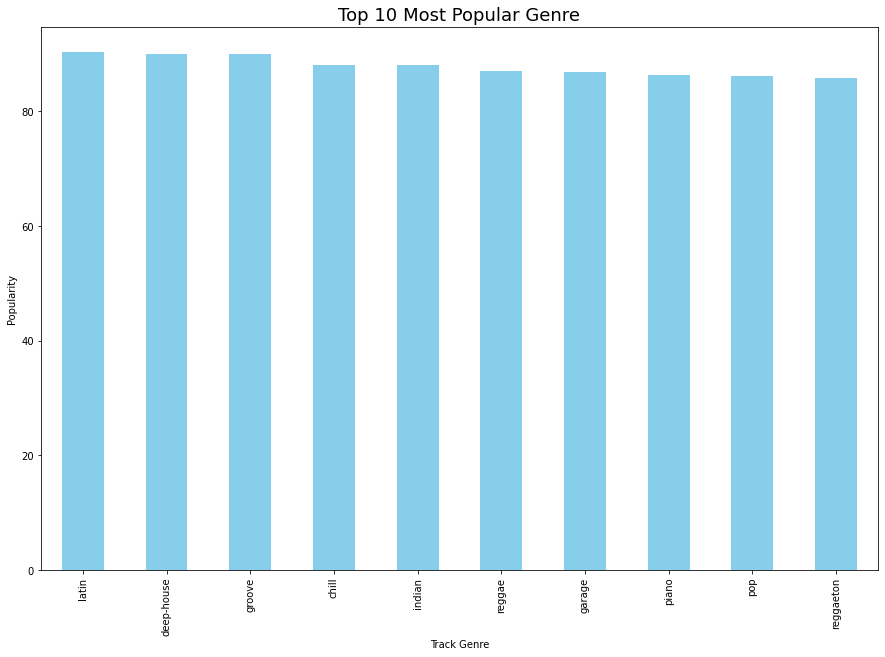

In [14]:
popularity_score.plot(kind='bar', figsize=(15,10), color='skyblue')
plt.title("Top 10 Most Popular Genre", size = 18)
plt.xticks(rotation=90)
plt.xlabel("Track Genre")
plt.ylabel("Popularity")

In [14]:
#to get top 10 songs of indian artist according to popularity in descending order and represent graphically.

import pandas as pd                                 #importing pandas lib
import numpy as np                                  #importing numpy lib
import matplotlib.pyplot as plt                       #import matplotlib lib

#reading CSV file 
df = pd.read_csv('spotify_dataset.csv')
df    

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,5,-16.393,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,-18.318,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,-10.895,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,7,-10.889,0.4130,135.960,4,world-music


In [15]:
#check all colum names in the data set
for i in df.columns:
    print(i);

track_id
artists
album_name
track_name
popularity
duration_ms
key
loudness
valence
tempo
time_signature
track_genre


In [16]:
#get shape of the dataset
df.shape

(114000, 12)

In [17]:
#read first 10 rows
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,6,-8.807,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,2,-8.822,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,11,-9.331,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,0,-8.700,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,1,-6.770,0.1960,78.899,4,acoustic


In [18]:
#get the unique artist name sin the dataset
df['artists'].unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [19]:
##get the unique track_genre in the dataset
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [20]:
#get all the row with 'indian' track_genre' and print its data
ind = df[df['track_genre'] == 'indian']
ind.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
55000,0NLkVxf0PyxsXBG3EuZcJf,Anuv Jain,Gul,Gul,71,217241,6,-12.301,0.342,86.970,4,indian
55001,6VBhH7CyP56BXjp8VsDFPZ,Pritam;Arijit Singh;Amitabh Bhattacharya,"Kesariya (From ""Brahmastra"")","Kesariya (From ""Brahmastra"")",88,268164,0,-6.525,0.436,94.009,4,indian
55002,7MBqVOzb8C3f0FXr2LBLiq,OAFF;Savera;Lothika;Kausar Munir,"Doobey (From ""Gehraiyaan"")","Doobey (From ""Gehraiyaan"")",73,219686,3,-6.532,0.359,119.014,4,indian
55003,1rDjwexewf4hrdZT7SRNsH,Faridkot;Amar Jalal,Nasha (Equals Sessions) - Single,Nasha (Equals Sessions),70,287573,6,-7.516,0.788,124.007,4,indian
55004,7cWnks0lsRtpAi87COOiXK,Salim–Sulaiman;Rahat Fateh Ali Khan;Jaideep Sahni,Aaja Nachle,O Re Piya,71,379768,11,-8.837,0.494,99.994,4,indian


In [21]:
#get the shape of the all 'indian' 'track_genre'
ind.shape

(1000, 12)

In [22]:
#get the number of unique artist in the indian  track_genre
ind['artists'].nunique()         

549

In [23]:
#get the last 5 data in the indian track genre
ind.tail()

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
55995,00bOo6r6YhVnxzDu4JhCWX,Papon,Bajrangi Bhaijaan,Tu Jo Mila (Reprise),42,257831,10,-9.205,0.265,122.017,4,indian
55996,1TxtDLNSEJANynR9Xp5TMe,Aamir Khan,Chan Mahiya,Chan Mahiya,40,210023,1,-3.098,0.329,80.577,4,indian
55997,2iLeerAUsEou9jRdBYZsVU,Pritam;Sarwar Khan;Sartaz Khan Barna,Dangal (Original Motion Picture Soundtrack),Haanikaarak Bapu,42,262857,7,-6.179,0.803,104.973,4,indian
55998,17CHY0FoOgypamXGpk0Kqj,Ajay Singha;Nirmalya Humtoo Dey,"Bollywood Love Instrumentals, Vol. 2",Tu Tu Hai Wohi - Unwind Instrumental,43,234986,11,-15.583,0.390,123.973,4,indian
55999,2w4wjkhy7jwhxpM90xKjHK,Jitendra Thankur;Shomu Seal,Relax with Bollywood Instrumentals,Chhukar Mere Man Ko - Unwind Instrumental,43,214280,5,-12.572,0.357,120.022,4,indian


In [24]:
#sort buy popularity
pop_ind = ind.sort_values(by = 'popularity', ascending = False)

In [25]:
#print the top 10 indian artist songs
india = pop_ind.head(10)
india

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
55001,6VBhH7CyP56BXjp8VsDFPZ,Pritam;Arijit Singh;Amitabh Bhattacharya,"Kesariya (From ""Brahmastra"")","Kesariya (From ""Brahmastra"")",88,268164,0,-6.525,0.436,94.009,4,indian
55008,0IGXY47K2ha3AHfX57wY1O,Pritam;Arijit Singh;Amitabh Bhattacharya;Jonit...,"Deva Deva (From ""Brahmastra"")","Deva Deva (From ""Brahmastra"")",79,279107,0,-7.636,0.439,112.062,4,indian
55031,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",77,228855,1,-5.843,0.236,82.941,4,indian
55016,5iCY0TXNImK4hyKfcplQsg,Anuv Jain,Baarishein,Baarishein,76,207309,2,-9.463,0.190,94.420,4,indian
55030,5O932cZmzOZGOGZz9RHx20,Pritam;Arijit Singh,Chhichhore,Khairiyat,75,280281,0,-9.016,0.293,124.914,4,indian
55017,0DXfJ2iKRDEG7rPgssWFea,Kanishk Seth;Kavita Seth,"Rangisari (From ""Jugjugg Jeeyo"")","Rangisari (From ""Jugjugg Jeeyo"")",75,223271,10,-9.280,0.319,140.012,4,indian
55007,7eQl3Yqv35ioqUfveKHitE,Pritam;Mohit Chauhan,Jab We Met,Tum Se Hi,74,321225,6,-7.842,0.608,130.015,4,indian
55032,5OcGETO7eEKjKme4gm0r7y,Pritam;Arijit Singh;Amitabh Bhattacharya,"Dance Ka Bhoot (From ""Brahmastra"")","Dance Ka Bhoot (From ""Brahmastra"")",74,245735,6,-5.297,0.584,136.008,4,indian
55011,4Hv055xg1SZZgwwGBx8Cr5,Pritam;Shreya Ghoshal;TUSHAR JOSHI,"Rasiya (From ""Brahmastra"")","Rasiya (From ""Brahmastra"")",74,265063,4,-7.538,0.636,78.990,4,indian
55015,1smFN2CLqGROu0J0UyvDfL,Pritam;Arijit Singh,Love Aaj Kal (Original Motion Picture Soundtrack),Shayad,74,247941,8,-7.642,0.319,135.875,4,indian


In [26]:
india[['popularity', 'track_name']]

,popularity,track_name
55001,88,"Kesariya (From ""Brahmastra"")"
55008,79,"Deva Deva (From ""Brahmastra"")"
55031,77,"Ranjha (From ""Shershaah"")"
55016,76,Baarishein
55030,75,Khairiyat
55017,75,"Rangisari (From ""Jugjugg Jeeyo"")"
55007,74,Tum Se Hi
55032,74,"Dance Ka Bhoot (From ""Brahmastra"")"
55011,74,"Rasiya (From ""Brahmastra"")"
55015,74,Shayad


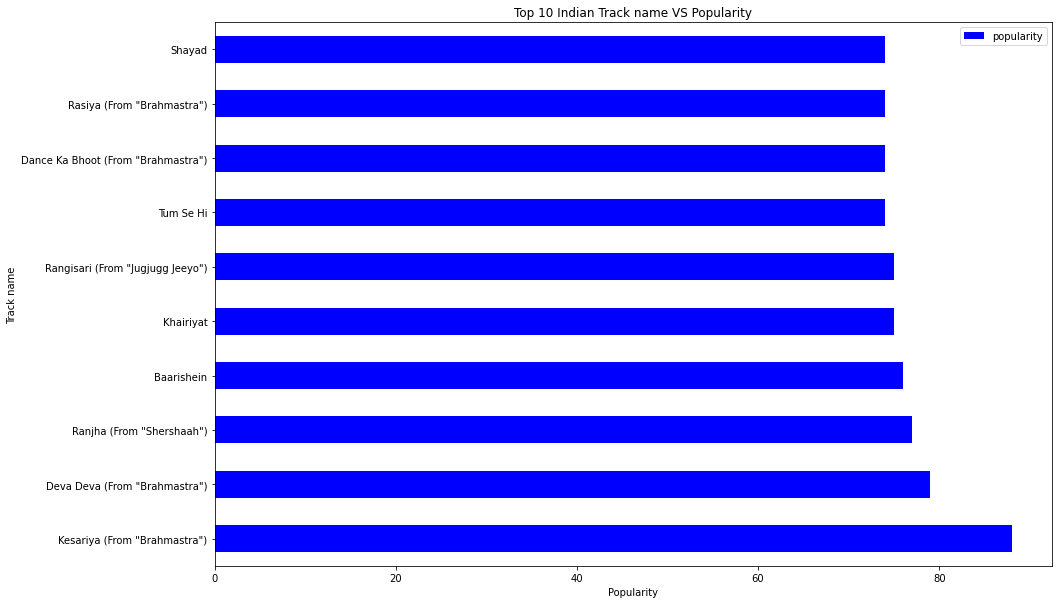

In [31]:
#plot the top 10 Indian songs and represent in barh chart
india.plot(kind='barh',x='track_name',y='popularity',figsize=(15,10), color='blue'),
plt.title('Top 10 Indian Track name VS Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track name')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#reading CSV file 
df = pd.read_csv('spotify_dataset.csv')
df                                         #printing the CSV file data.

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,5,-16.393,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,-18.318,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,-10.895,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,7,-10.889,0.4130,135.960,4,world-music


In [2]:
#check for null values
df.isnull().sum()

track_id          0
artists           0
album_name        0
track_name        0
popularity        0
duration_ms       0
key               0
loudness          0
valence           0
tempo             0
time_signature    0
track_genre       0
dtype: int64

In [3]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   track_id        114000 non-null  object 
 1   artists         114000 non-null  object 
 2   album_name      114000 non-null  object 
 3   track_name      114000 non-null  object 
 4   popularity      114000 non-null  int64  
 5   duration_ms     114000 non-null  int64  
 6   key             114000 non-null  int64  
 7   loudness        114000 non-null  float64
 8   valence         114000 non-null  float64
 9   tempo           114000 non-null  float64
 10  time_signature  114000 non-null  int64  
 11  track_genre     114000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 10.4+ MB


In [4]:
#to see description of dataset and its transpose.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000,50.000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000,261506.000,5237295.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000,8.000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004,-5.003,4.532
valence,114000.0,0.474068,0.259261,0.000,0.26000,0.464,0.683,0.995
tempo,114000.0,122.147837,29.978197,0.000,99.21875,122.017,140.071,243.372
time_signature,114000.0,3.904035,0.432621,0.000,4.00000,4.000,4.000,5.000


In [5]:
#to get loaction of specific track name on the particular index location 
df[['track_name']].iloc[55]

track_name    The Enemy
Name: 55, dtype: object

In [6]:
#convert duration millisecond into duration seconds in new column
df['duration_sec'] = df['duration_ms'].apply(lambda x: round(x/1000))
df.drop('duration_ms',inplace = True, axis = 1)
df

,track_id,artists,album_name,track_name,popularity,key,loudness,valence,tempo,time_signature,track_genre,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,1,-6.746,0.7150,87.917,4,acoustic,231
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,1,-17.235,0.2670,77.489,4,acoustic,150
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,-9.734,0.1200,76.332,4,acoustic,211
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,-18.515,0.1430,181.740,3,acoustic,202
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,2,-9.681,0.1670,119.949,4,acoustic,199
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,5,-16.393,0.0339,125.995,5,world-music,385
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0,-18.318,0.0350,85.239,4,world-music,385
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,0,-10.895,0.7430,132.378,4,world-music,271
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,7,-10.889,0.4130,135.960,4,world-music,284


In [7]:
#get the head of the new duration in seconds dataset
df.duration_sec.head()

0    231
1    150
2    211
3    202
4    199
Name: duration_sec, dtype: int64

Text(0.5, 1.0, 'Correlation heatmap between variable')

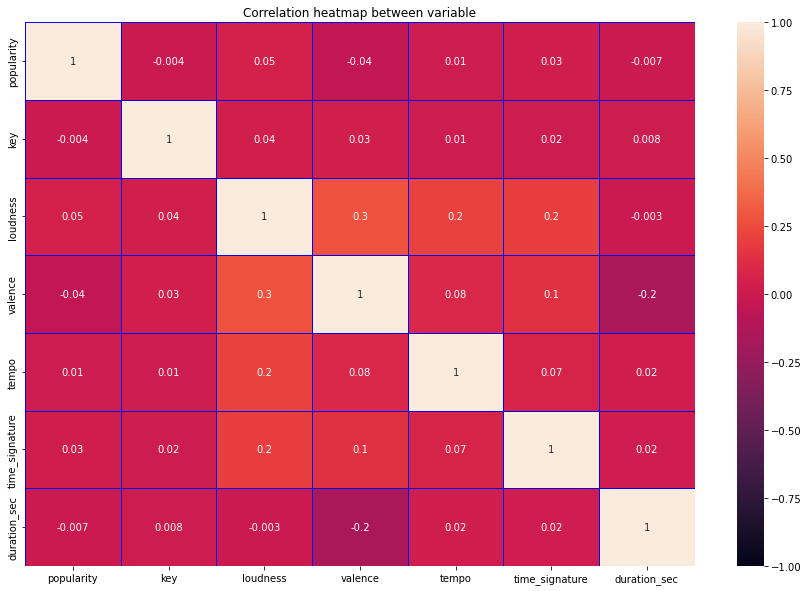

In [8]:
#correlation heatmap of the dataset.
corr_df = df.corr(method = 'pearson')
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=-1,vmax=1, center=0,cmap='rocket',linewidth=1,linecolor='Blue')
heatmap.set_title('Correlation heatmap between variable')

In [9]:
#to get first 5 col of the dataset.
df.head()

,track_id,artists,album_name,track_name,popularity,key,loudness,valence,tempo,time_signature,track_genre,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,1,-6.746,0.715,87.917,4,acoustic,231
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,1,-17.235,0.267,77.489,4,acoustic,150
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,-9.734,0.120,76.332,4,acoustic,211
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,-18.515,0.143,181.740,3,acoustic,202
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,2,-9.681,0.167,119.949,4,acoustic,199


In [22]:
#only 1% of data from the whole dataset
df1 = df.sample(int(0.01 * len(df)))   #take random data from the dataset by using sample method.

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

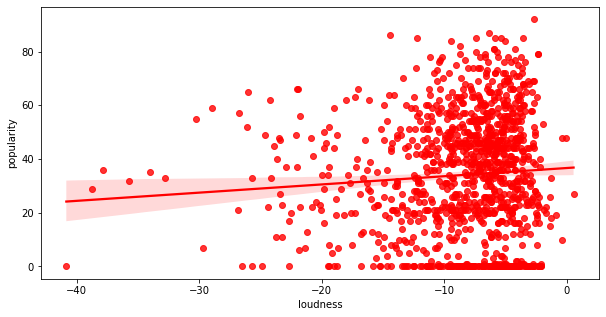

In [23]:
#regression plot to show relationship between popularity and loudness
plt.figure(figsize = [10,5])
sns.regplot(data = df1, x='loudness',y='popularity',color='red')

In [1]:
#Correlation between loudness and popularity of tracks by using hypothisis.

import pandas as pd                                 #importing pandas lib
import numpy as np                                  #importing numpy lib
import matplotlib.pyplot as plt                       #import matplotlib lib
import seaborn as sns
from sklearn.linear_model import LinearRegression     #for linear regression.
from sklearn.model_selection import train_test_split  #for train and test set of the data.

#reading CSV file 
df = pd.read_csv('spotify_dataset.csv')
df    

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,5,-16.393,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,-18.318,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,-10.895,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,7,-10.889,0.4130,135.960,4,world-music


In [2]:
#display first 5 rows
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,key,loudness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,1,-6.746,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,1,-17.235,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,-9.734,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,-18.515,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,2,-9.681,0.167,119.949,4,acoustic


In [3]:
#display discription of dataset.
df.describe()

,popularity,duration_ms,key,loudness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,5.309140,-8.258960,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,3.559987,5.029337,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,-49.531000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,2.000000,-10.013000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,5.000000,-7.004000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,8.000000,-5.003000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,11.000000,4.532000,0.995000,243.372000,5.000000


In [4]:
#display info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   track_id        114000 non-null  object 
 1   artists         114000 non-null  object 
 2   album_name      114000 non-null  object 
 3   track_name      114000 non-null  object 
 4   popularity      114000 non-null  int64  
 5   duration_ms     114000 non-null  int64  
 6   key             114000 non-null  int64  
 7   loudness        114000 non-null  float64
 8   valence         114000 non-null  float64
 9   tempo           114000 non-null  float64
 10  time_signature  114000 non-null  int64  
 11  track_genre     114000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 10.4+ MB


In [5]:
#display which col which we need loudness and popularity.
df[['loudness','popularity']]

,loudness,popularity
0,-6.746,73
1,-17.235,55
2,-9.734,57
3,-18.515,71
4,-9.681,82
...,...,...
113995,-16.393,21
113996,-18.318,22
113997,-10.895,22
113998,-10.889,41


In [6]:
#using regression model split the data into train and test sets.
#X=loudness and y=popularity
X = df['loudness'].values
y = df['popularity'].values

In [7]:
#print the X data in array.
print(X)

[ -6.746 -17.235  -9.734 ... -10.895 -10.889 -10.204]


In [8]:
#print the y data in array.
print(y)

[73 55 57 ... 22 41 22]


In [9]:
#reshape X.
X = X.reshape(-1, 1)
X

array([[ -6.746],
       [-17.235],
       [ -9.734],
       ...,
       [-10.895],
       [-10.889],
       [-10.204]])

In [11]:
#split data into 70-30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [12]:
#printing the shape of the set of train and test.
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (79800, 1)
y_train shape (79800,)
X_test shape (34200, 1)
y_test shape (34200,)


Text(0, 0.5, 'Popularity')

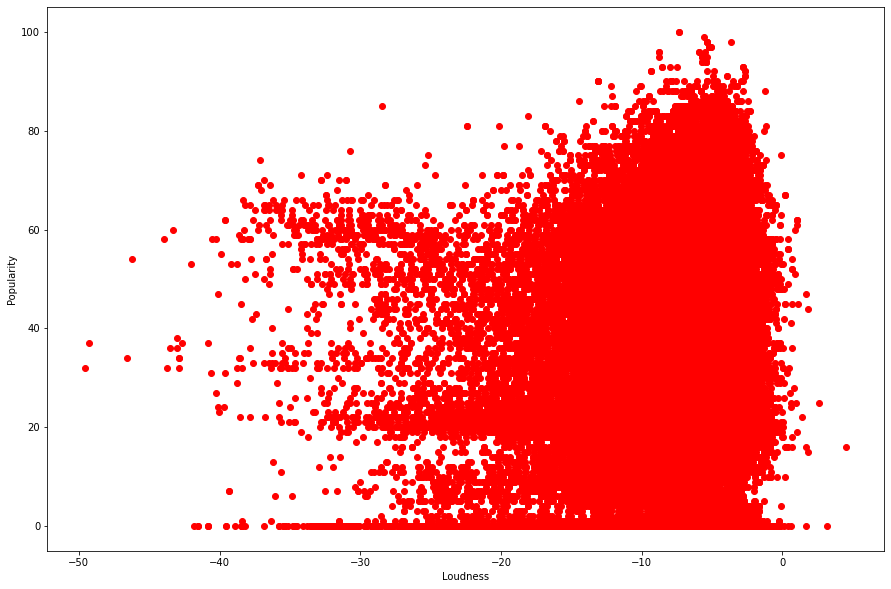

In [13]:
#display plot 
plt.figure(figsize=(15, 10))
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Loudness')
plt.ylabel('Popularity')

In [14]:
#fit the linear model
lm = LinearRegression()
lm.fit(X_train, y_train)     #
y_predict = lm.predict(X_test)

In [15]:
#get the accuracy of both test and train by score method in sklearn
print(f'Training Acc {round(lm.score(X_train, y_train) * 100, 2)}%')
print(f'Testing Acc {round(lm.score(X_test, y_test) * 100, 2)}%')

Training Acc 0.25%
Testing Acc 0.25%


<AxesSubplot:xlabel='loudness', ylabel='popularity'>

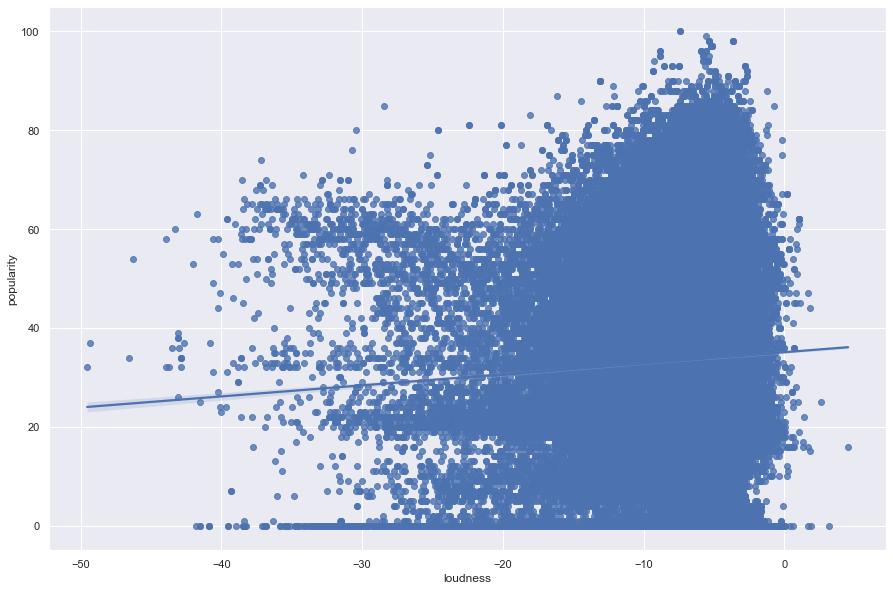

In [16]:
#display plot using seaborn 
sns.set()
plt.figure(figsize=(15, 10))
sns.regplot(x='loudness', y='popularity', data=df)